# 一组机构的持仓股票总价值的历史变化

例如top20对冲基金披露的持仓总价值历史变化

In [1]:
import pandas as pd
import numpy as np
import glob,os

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
pd.set_option('max_rows',200)

In [4]:
file = glob.glob(os.path.join("13f-hr/000???????13F-HR??-??-20??.csv"))
print(len(file))

641


In [5]:
dl = []
for f in file:
    dlTemp = pd.read_csv(f, usecols=['Name of Issuer', 'CUSIP', 'Value', 'SHRS OR SH', 'Date', 'Filing Manager', 'CIK'])
    dlTop10 = dlTemp.sort_values(by='Value', ascending=False, ignore_index=True).head(5)
    dl.append(dlTemp)

dlTotal = pd.concat(dl, ignore_index=True)

In [6]:
# 统计高频持有的证券
print(dlTotal['CIK'].value_counts())
print(dlTotal['Filing Manager'].value_counts())

1088875    19765
1350694    11211
1029160     6683
1067983     4769
1135730     4636
1224962     3903
1079114     3432
1697748     3367
1628110     2165
1167483     1827
1061165     1297
1346824     1258
1536411     1248
1387322     1106
1061768     1091
1656456      859
1541617      826
1510589      825
1577524      385
1336528      266
1791786      257
1578684      185
1671657      171
1579984      145
Name: CIK, dtype: int64
BAILLIE GIFFORD & CO                        19765
Bridgewater Associates, LP                  11211
SOROS FUND MANAGEMENT LLC                    6683
COATUE MANAGEMENT LLC                        4636
PERCEPTIVE ADVISORS LLC                      3903
Berkshire Hathaway Inc                       3744
GREENLIGHT CAPITAL INC                       3432
ARK Investment Management LLC                3367
Melvin Capital Management LP                 2165
TIGER GLOBAL MANAGEMENT LLC                  1827
LONE PINE CAPITAL LLC                        1297
Duquesne Family Of

In [7]:
dlSelected = dlTotal[['Value', 'Date', 'CIK']]
dlSelected.head(10)

,Value,Date,CIK
0,89892,2020-06-30,1656456
1,727988,2020-06-30,1656456
2,472146,2020-06-30,1656456
3,27592,2020-06-30,1656456
4,60838,2020-06-30,1656456
5,620735,2020-06-30,1656456
6,274404,2020-06-30,1656456
7,33355,2020-06-30,1656456
8,63122,2020-06-30,1656456
9,133812,2020-06-30,1656456


In [8]:
dlGrouped = dlSelected.groupby(by=['Date', 'CIK'])

In [9]:
resSelected = dlGrouped.agg({'Value': sum})['Value'].groupby(level=0, group_keys=False).nlargest(10).reset_index()

In [10]:
# print(resSelected['CIK'].value_counts())
targetCik = list(resSelected['CIK'].value_counts().index)[0:5]

In [11]:
resSelected5 = resSelected[resSelected['CIK'].isin(targetCik)]

In [12]:
resFinal = resSelected5.pivot_table(values='Value', index=resSelected5.Date, columns='CIK', aggfunc='first').reset_index()

In [13]:
resForamt = resFinal.replace(23852922220, 23852922)
resForamt = resForamt.replace(regex=r'-03-31$', value='Q1').replace(regex=r'-06-30$', value='Q2').replace(regex=r'-09-30$', value='Q3').replace(regex=r'-12-31$', value='Q4')
resForamt.head(5)

CIK,Date,1061165,1067983,1088875,1135730,1167483
0,2013Q2,20533834,89031205,32952553,9021308,5745302
1,2013Q3,22395046,92035233,39527317,9823169,5969329
2,2013Q4,23246007,104836593,42332832,10221402,8036274
3,2014Q1,23001722,105772705,42467283,5655103,7364766
4,2014Q2,24737838,107580386,46282447,8030920,7890617


In [14]:
# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 100
y_UL = int(resForamt.iloc[:, 1:].max().max()*1.1)
y_interval = 1000000
mycolors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple']  

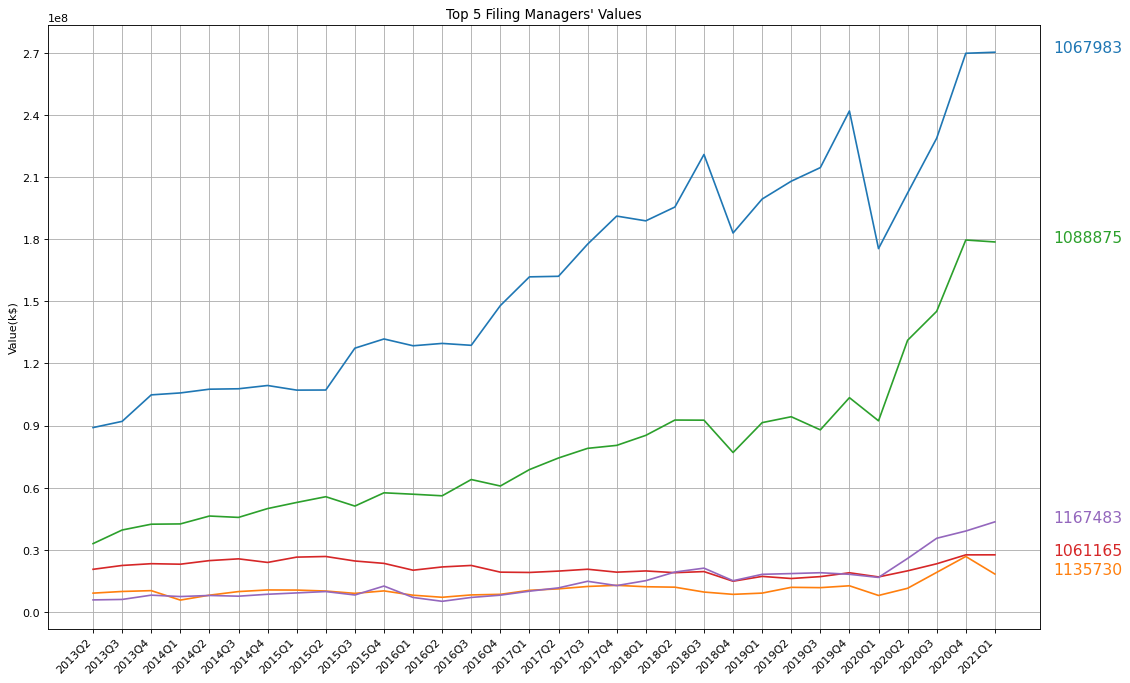

In [15]:
# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(16, 10), dpi= 80)    

columns = resForamt.columns[1:]  
for i, column in enumerate(columns):    
    plt.plot(resForamt.Date.values, resForamt[column].values, lw=1.5, color=mycolors[i])    
    plt.text(resForamt.shape[0]+1, resForamt[column].values[-1], column, fontsize=14, color=mycolors[i])

ax.set(ylabel='Value(k$)',
       title="Top 5 Filing Managers' Values")
ax.grid()

plt.xticks(rotation=45, horizontalalignment='right')
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(10)) 

fig.savefig("Top_5_Filing_Managers_Values.png")
plt.show()
